## Emailing Plotly Graphs

In the [Plotly Webapp](https://plotly.com/plot) you can share your graphs over email to your colleagues who are also Plotly members. If your making graphs periodically or automatically, e.g. [in Python with a cron job](http://moderndata.plot.ly/update-plotly-charts-with-cron-jobs-and-python/), it can be helpful to also share the graphs that you're creating in an email to your team.

This notebook is a primer on sending nice HTML emails with Plotly graphs in Python. We use:
- [Plotly](https://plotly.com/python/) for interactive, web native graphs
- [IPython Notebook](https://plotly.com/ipython-notebooks) to create this notebook, combining text, HTML, and Python code
- [`smtplib` and `email`](https://docs.python.org/2/library/email-examples.html) libraries included in the Python standard library

### Part 1 - An email template

In [1]:
# The public plotly graphs to include in the email. These can also be generated with `py.plot(figure, filename)`
graphs = [
    'https://plotly.com/~christopherp/308',
    'https://plotly.com/~christopherp/306',
    'https://plotly.com/~christopherp/300',
    'https://plotly.com/~christopherp/296'
]

In [2]:
from IPython.display import display, HTML

template = (''
    '<a href="{graph_url}" target="_blank">' # Open the interactive graph when you click on the image
        '<img src="{graph_url}.png">'        # Use the ".png" magic url so that the latest, most-up-to-date image is included
    '</a>'
    '{caption}'                              # Optional caption to include below the graph
    '<br>'                                   # Line break
    '<a href="{graph_url}" style="color: rgb(190,190,190); text-decoration: none; font-weight: 200;" target="_blank">'
        'Click to comment and see the interactive graph'  # Direct readers to Plotly for commenting, interactive graph
    '</a>'
    '<br>'
    '<hr>'                                   # horizontal line
'')

email_body = ''
for graph in graphs:
    _ = template
    _ = _.format(graph_url=graph, caption='')
    email_body += _
    
display(HTML(email_body))

Looks pretty good!

## Part 2 - Sending the email

Email server settings. This example will use the common settings for `gmail`

In [3]:
me  = 'chris@plot.ly'
recipient = 'chris@plot.ly'
subject = 'Graph Report'

email_server_host = 'smtp.gmail.com'
port = 587
email_username = me
email_password = 'xxxxx'

Send the email

In [5]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import os

msg = MIMEMultipart('alternative')
msg['From'] = me
msg['To'] = recipient
msg['Subject'] = subject

msg.attach(MIMEText(email_body, 'html'))

server = smtplib.SMTP(email_server_host, port)
server.ehlo()
server.starttls()
server.login(email_username, email_password)
server.sendmail(me, recipient, msg.as_string())
server.close()

![Screenshot of the sent email](http://i.imgur.com/mzCZUEE.png)

## Notes

### Sharing Private Images

Plotly graphs are *public* by default. This means that they will appear on your profile, the plotly feed, google search results.

To share private images in an email, make your graphs ["secret"](plot.ly/python/privacy). The graphs will be unlisted from your profile but will still be accessible by the email server via a direct link - no login authentication is required.

Secret links have the form: [https://plotly.com/~&lt;username&gt;/&lt;id&gt;?share_key=&lt;share_key&gt;](). Secret images have ".png" after "id" and before the "?". For example:

This graph: https://plotly.com/~chelsea_lyn/17461?share_key=3kCBg9awEny15vobuAP5Up

Has the secret unlisted image url: https://plotly.com/~chelsea_lyn/17461.png?share_key=3kCBg9awEny15vobuAP5Up

In [6]:
from IPython.display import display, HTML

template = (''
    '<a href="{graph_url}" target="_blank">' # Open the interactive graph when you click on the image
        '<img src="{graph_url}">'        # Use the ".png" magic url so that the latest, most-up-to-date image is included
    '</a>'
    '{caption}'                              # Optional caption to include below the graph
    '<br>'                                   # Line break
    '<a href="{graph_url}" style="color: rgb(190,190,190); text-decoration: none; font-weight: 200;" target="_blank">'
        'Click to comment and see the interactive graph'  # Direct readers to Plotly for commenting, interactive graph
    '</a>'
    '<br>'
    '<hr>'                                   # horizontal line
'')

email_body = ''
graph = 'https://plotly.com/~chelsea_lyn/17461.png?share_key=3kCBg9awEny15vobuAP5Up'
_ = template
_ = _.format(graph_url=graph, caption='')
email_body += _

display(HTML(email_body))

### The graph images

The HTML template that we used includes the images by their URL on the Plotly server. The viewers of the email must have permission on Plotly to view your graph. Graphs sent in emails by Chart Studio Enterprise users on private networks will not be able to be viewed outside of the network.

The reader of your email will always see the latest verison of the graph! This is great - if you tweak your graph or add an annotation, you don't need to resend the email out. If your graph updates regularly, e.g. every hour, the reader will see the latest, most updated version of the chart.

For some email clients, you can download the image and include it inline the email. This allows you to share the graph outside of your network with Chart Studio Enterprise, and keep the graph entirely private. [Note that this is not widely supported.](https://www.campaignmonitor.com/blog/email-marketing/2013/02/embedded-images-in-html-email/) Here is the support from a few years ago: ![embedded image support in emails from 2003](http://i.imgur.com/WIRhmCz.png)

Here is how to embed images inline in HTML:


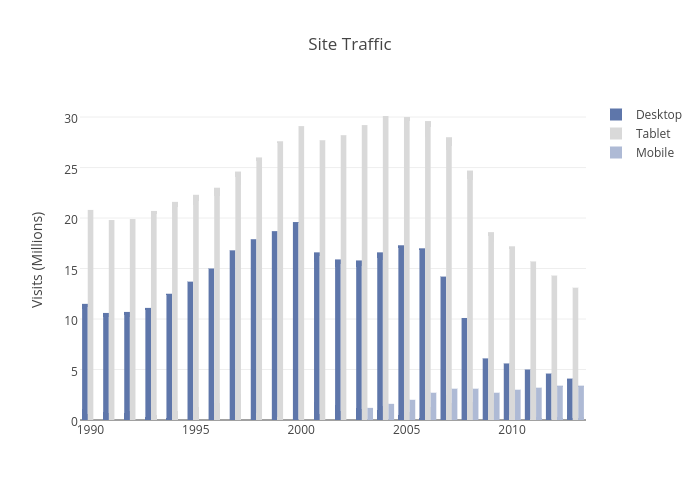
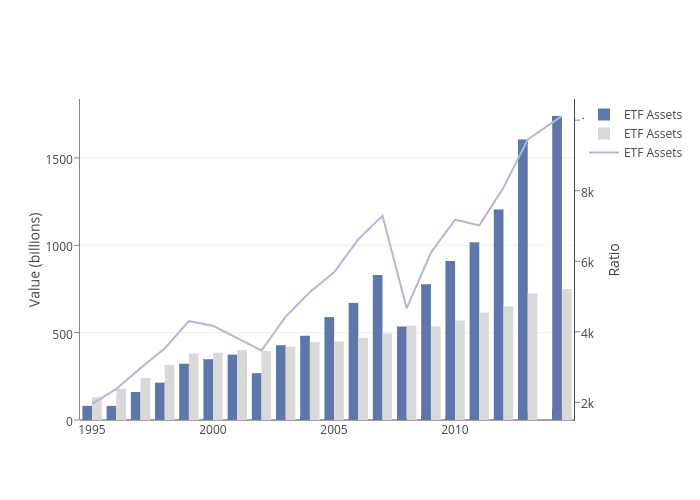
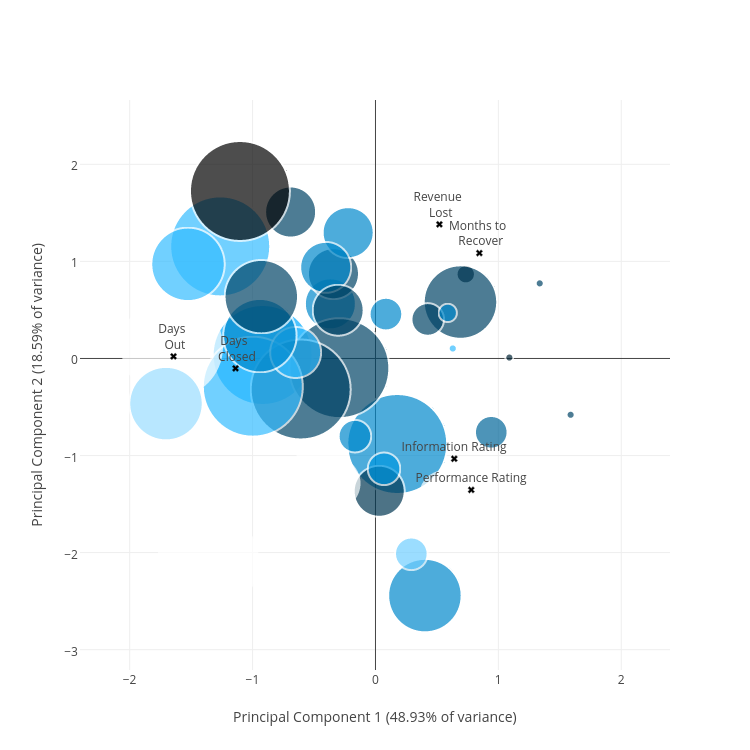
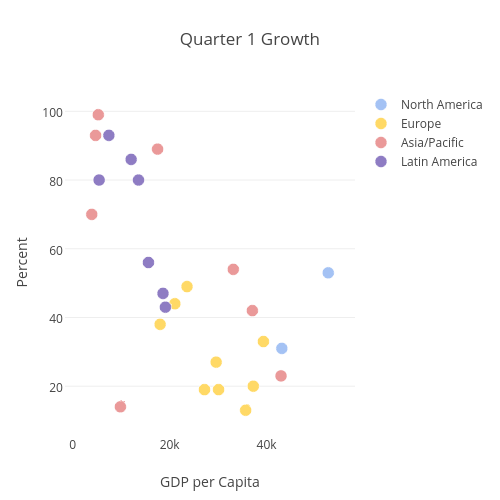

In [7]:
import requests
import base64

template = (''
    '<img src="data:image/png;base64,{image}">' 
    '{caption}'                              # Optional caption to include below the graph
    '<br>'
    '<hr>'
'')

email_body = ''
for graph_url in graphs:
    response = requests.get(graph_url + '.png') # request Plotly for the image
    response.raise_for_status()
    image_bytes = response.content
    image = base64.b64encode(image_bytes).decode("ascii")
    _ = template
    _ = _.format(image=image, caption='')
    email_body += _

display(HTML(email_body))

Alternatively, you can create the image on the fly, without a URL using `py.image.get`. (Learn more about `py.image` by calling `help(py.image)`)


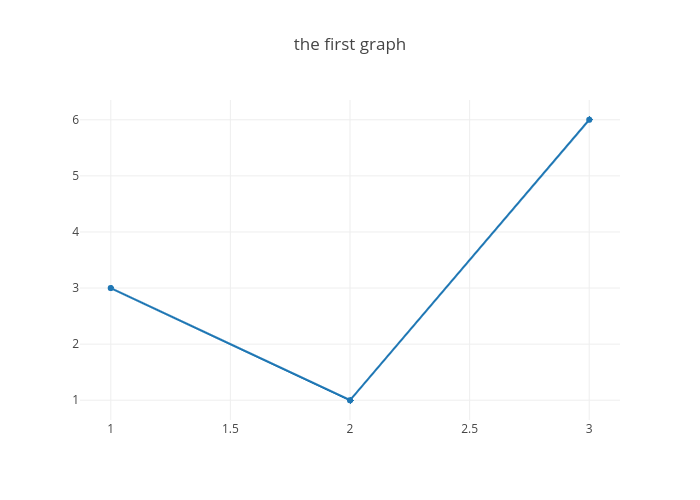
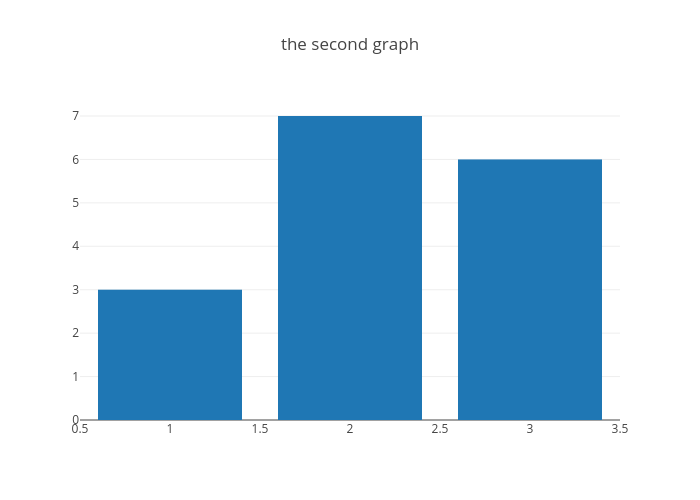

In [8]:
import plotly.plotly as py

# A collection of Plotly graphs
figures = [
    {'data': [{'x': [1,2,3], 'y': [3,1,6]}], 'layout': {'title': 'the first graph'}},
    {'data': [{'x': [1,2,3], 'y': [3,7,6], 'type': 'bar'}], 'layout': {'title': 'the second graph'}}
]

# Generate their images using `py.image.get`
images = [base64.b64encode(py.image.get(figure)).decode("ascii") for figure in figures]

email_body = ''
for image in images:
    _ = template
    _ = _.format(image=image, caption='')
    email_body += _
    
display(HTML(email_body))

### The graph URLs

We hard-coded the graph URLs above, but we can also generate the URLs with `py.plot`:

In [9]:
import plotly.plotly as py

url = py.plot([{'x': [1,2,3], 'y': [3,1,6], 'type': 'bar'}], auto_open=False, filename='email-report-graph-1')
print(url)

https://plotly.com/~PythonPlotBot/3079


### Updating graphs

If we use the same `filename`, the graph will save to the same URL. So, if we include a graph in an email by it's URL, we can update that graph by calling `py.plot` with the same filename.

### Learn more
- Questions? <support@plot.ly>
- [Getting started with Plotly and Python](https://plotly.com/python/getting-started)
- [Updating Plotly graphs with Python and cron jobs](http://moderndata.plot.ly/update-plotly-charts-with-cron-jobs-and-python/)
- [Using Plotly offline in IPython notebooks](https://plotly.com/python/offline)
- [Generate HTML reports with Python, Pandas, and Plotly](http://moderndata.plot.ly/generate-html-reports-with-python-pandas-and-plotly/)
- [Edit this tutorial](https://github.com/plotly/documentation/tree/gh-pages)

In [11]:
! pip install publisher --upgrade

import publisher
publisher.publish('email-reports', '/python/email-reports', 
                  'Emailing Plotly Graphs with Python', 
                  'How to email Plotly graphs in HTML reports with Python.',
                   uses_plotly_offline=True)

Requirement already up-to-date: publisher in c:\anaconda\anaconda3\lib\site-packages (0.13)
